# Lab 5. Support Vector Machine (SVM)

**Author:** &nbsp;&nbsp;&nbsp;*Gabriel Szewczyk*</br>
**Date:** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*04.04.2024*

## 1. Sample data
import packages

In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

Generate example data

In [3]:
n_cls = 20   # Number of samples in each class.
 
np.random.seed(1)  # for reproducibility
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2)  # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3)  # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4)  # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))
 
X = np.vstack((
    np.hstack((x11, x12)),
    np.hstack((x21, x22))
))
 
y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))

Train a model of a linear SVC classifier (with regularisation coeficient C=1000)

In [4]:
clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y)

SVC(C=1000, kernel='linear', probability=True, random_state=1)

Visualise feature space, observations, support vectors and decision boundaries with margin

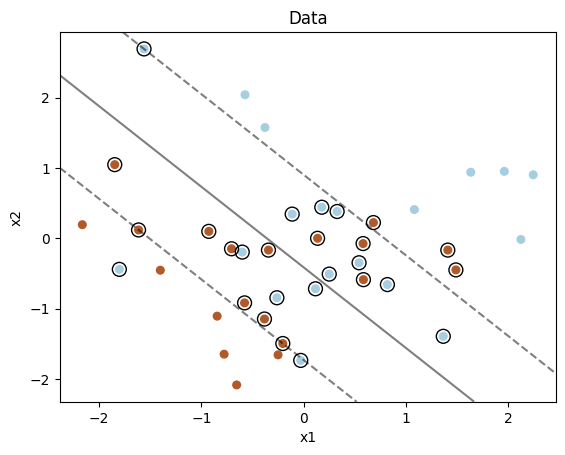

In [5]:
fig = plt.figure(1)
plt.clf()
 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
 
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
 
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()

Make classification of new samples

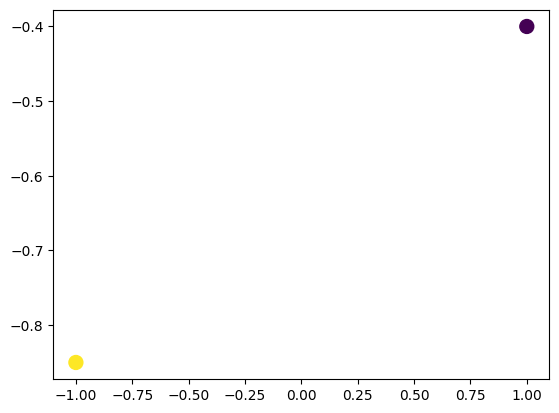

In [6]:
X_new = np.array([
    [1, -0.4],
    [-1, -0.85],
    ])
 
y_new = clf.predict(X_new)
 
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()

Calculate probabilities a posteriori for new samples

In [7]:
# Get posterior probabilities for predictions (requires SVC to be created with
#   `probability=True`).
post_probs = clf.predict_proba(X_new)
print(post_probs)

[[0.62901122 0.37098878]
 [0.26314804 0.73685196]]


## 2. Classification of iris dataset
import iris dataset

In [8]:
from sklearn.datasets import load_iris

irisRaw = load_iris()

# read iris with pd.DataFrame including column names
iris = pd.DataFrame(data= np.c_[irisRaw['data'], irisRaw['target']],
                     columns= irisRaw['feature_names'] + ['target'])

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [9]:
print(iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  

visualize features

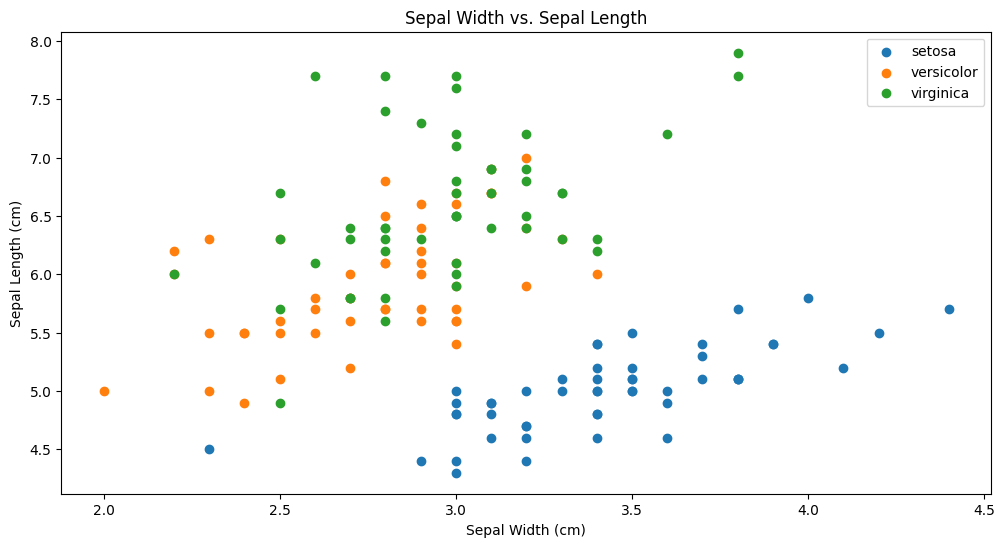

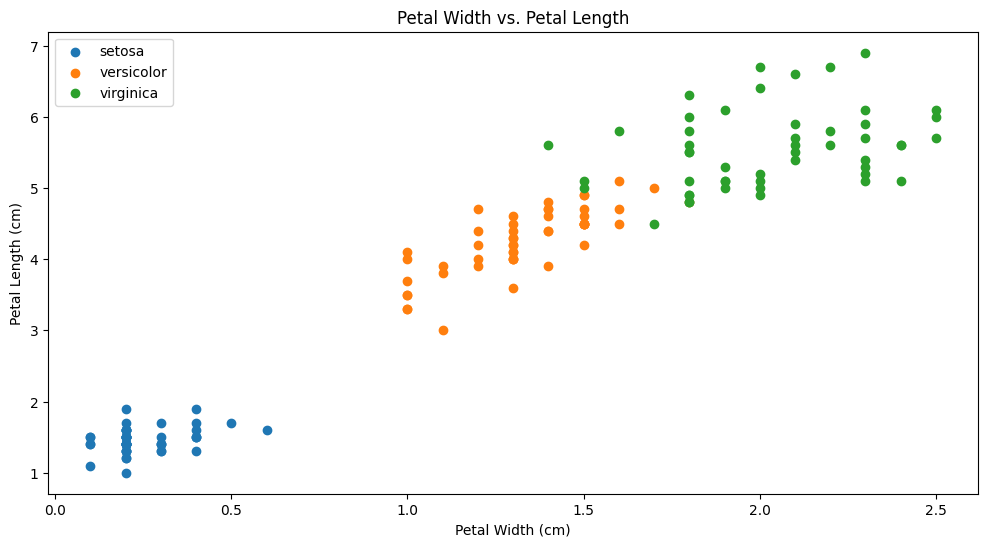

In [10]:
plt.figure(figsize=(12,6))
for target, target_name in enumerate(irisRaw.target_names):
    plt.scatter(iris[iris['target'] == target]['sepal width (cm)'],
                iris[iris['target'] == target]['sepal length (cm)'],
                label=target_name)

plt.xlabel("Sepal Width (cm)")
plt.ylabel("Sepal Length (cm)")
plt.title("Sepal Width vs. Sepal Length")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
for target, target_name in enumerate(irisRaw.target_names):
    plt.scatter(iris[iris['target'] == target]['petal width (cm)'],
                iris[iris['target'] == target]['petal length (cm)'],
                label=target_name)

plt.xlabel("Petal Width (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Petal Width vs. Petal Length")
plt.legend()
plt.show()

Feature correlation matrix

In [11]:
correlation_matrix = iris.corr()
print("\nFeature correlation matrix:")
print(correlation_matrix)


Feature correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# split dataset on features and labels
X = iris.drop('target', axis=1)
y = iris['target']

# split dataset on train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=12345)

# normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', decision_function_shape='ovr')
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

# calculate accuracy of fitting
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy: {:.2f}%".format(accuracy * 100))

print("\nClassification report:")
print(classification_report(y_test, y_pred))

Classification accuracy: 97.78%

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      0.94      0.97        17
         2.0       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



confusion matrix

Text(0.5, 23.52222222222222, 'Predicted class affiliation')

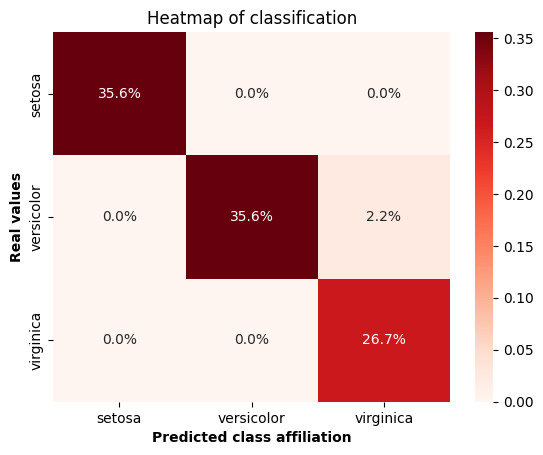

In [13]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

cf_matrix = confusion_matrix(y_test, y_pred)
labels = np.asarray(['True Neg', 'False Pos', 'False Neg', 'True Pos']).reshape(2, 2)
# heatmap(data=cf_matrix, annot=True, fmt='', cmap='Reds', xticklabels=irisRaw.target_names, yticklabels=irisRaw.target_names)
heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.1%', cmap='Reds', xticklabels=irisRaw.target_names, yticklabels=irisRaw.target_names)
plt.title('Heatmap of classification')
plt.ylabel('Real values', fontweight='bold')
plt.xlabel('Predicted class affiliation', fontweight='bold')

Classification with considering only **sepal length** and **sepal width** features

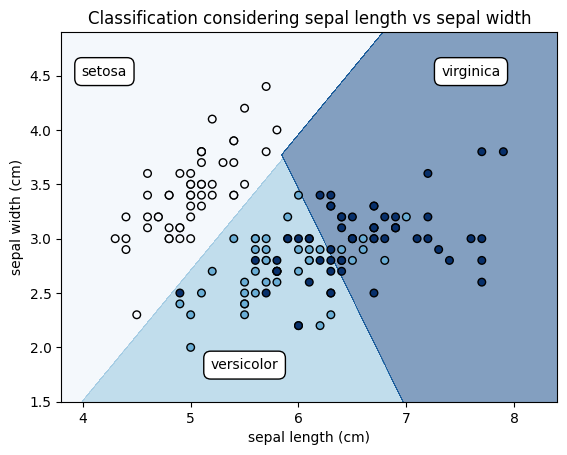

In [14]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_iris

X = irisRaw.data[:, :2] 
y = irisRaw.target

clf = svm.SVC(kernel="linear", C=1000, decision_function_shape='ovr', random_state=1, probability=True)
clf.fit(X, y)

# Set up the plot
X0, X1 = X[:, 0], X[:, 1]
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    cmap=plt.cm.Blues,
    alpha=0.5,
    grid_resolution=2000,
    eps=0.5,
    xlabel=irisRaw.feature_names[0],
    ylabel=irisRaw.feature_names[1],
)

# Scatter plot of data points
plt.scatter(X0, X1, c=y, cmap=plt.cm.Blues, s=30, edgecolors="k", label=iris.target)
plt.title("Classification considering sepal length vs sepal width")
plt.text(4.2, 4.5, 'setosa', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(5.5, 1.8, 'versicolor', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(7.6, 4.5, 'virginica', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

Classification with considering only **petal length** and **petal width** features

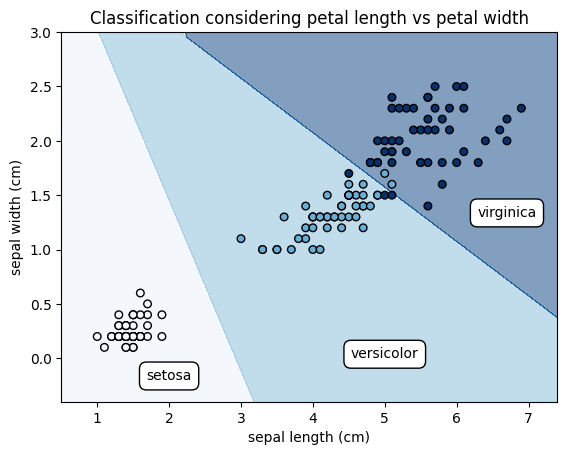

In [15]:
X = irisRaw.data[:, 2:4] 
y = irisRaw.target

clf = svm.SVC(kernel="linear", C=1000, decision_function_shape='ovr', random_state=1, probability=True)
clf.fit(X, y)

# Set up the plot
X0, X1 = X[:, 0], X[:, 1]
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    cmap=plt.cm.Blues,
    alpha=0.5,
    grid_resolution=2000,
    eps=0.5,
    xlabel=irisRaw.feature_names[0],
    ylabel=irisRaw.feature_names[1],
)

# Scatter plot of data points
plt.scatter(X0, X1, c=y, cmap=plt.cm.Blues, s=30, edgecolors="k", label=iris.target)
plt.title("Classification considering petal length vs petal width")
plt.text(2, -0.2, 'setosa', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(5, 0, 'versicolor', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(6.7, 1.3, 'virginica', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

Classification with considering only **sepal length** and **petal length** features

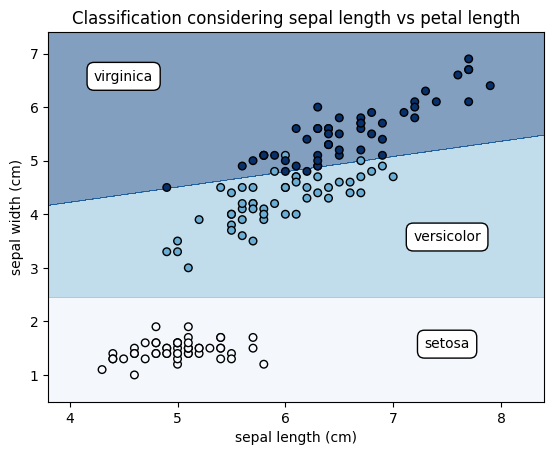

In [16]:
X = irisRaw.data[:, (0,2)] 
y = irisRaw.target

clf = svm.SVC(kernel="linear", C=1000, decision_function_shape='ovr', random_state=1, probability=True)
clf.fit(X, y)

# Set up the plot
X0, X1 = X[:, 0], X[:, 1]
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    cmap=plt.cm.Blues,
    alpha=0.5,
    grid_resolution=2000,
    eps=0.5,
    xlabel=irisRaw.feature_names[0],
    ylabel=irisRaw.feature_names[1],
)

# Scatter plot of data points
plt.scatter(X0, X1, c=y, cmap=plt.cm.Blues, s=30, edgecolors="k", label=iris.target)
plt.title("Classification considering sepal length vs petal length")
plt.text(7.5,1.5, 'setosa', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(7.5,3.5, 'versicolor', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(4.5,6.5, 'virginica', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

Classification with considering only **sepal width** and **petal width** features

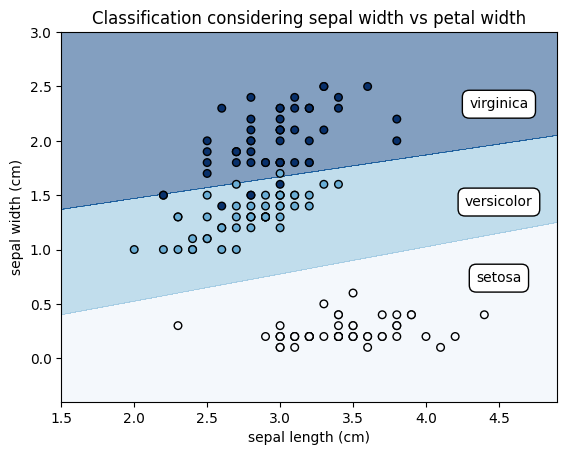

In [17]:
X = irisRaw.data[:, (1,3)] 
y = irisRaw.target

clf = svm.SVC(kernel="linear", C=1000, decision_function_shape='ovr', random_state=1, probability=True)
clf.fit(X, y)

# Set up the plot
X0, X1 = X[:, 0], X[:, 1]
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    cmap=plt.cm.Blues,
    alpha=0.5,
    grid_resolution=2000,
    eps=0.5,
    xlabel=irisRaw.feature_names[0],
    ylabel=irisRaw.feature_names[1],
)

# Scatter plot of data points
plt.scatter(X0, X1, c=y, cmap=plt.cm.Blues, s=30, edgecolors="k", label=iris.target)
plt.title("Classification considering sepal width vs petal width")
plt.text(4.5, 0.7, 'setosa', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(4.5, 1.4, 'versicolor', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.text(4.5, 2.3, 'virginica', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()